## RNN 언어 모델

<br>

<br>

### RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

- n-gram 언어 모델과 NNLM은 고정된 개수의 단어만을 입력으로 받아야한다는 단점 존재
- 시점(time step)이라는 개념이 도입된 RNN으로 언어 모델을 만들면 입력의 길이를 고정하지 않을 수 있음
- RNN으로 만든 언어 모델을 RNNLM(Recurrent Neural Network Language Model)

<br>

```
예문 : 'what will the fat cat sit on'
```

![rnnlm1_final_final[1].PNG](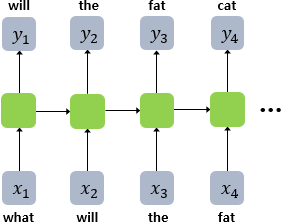)

- **RNNLM은 기본적으로 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 받음**
  - what을 입력받으면, will을 예측하고 이 will은 다음 시점의 입력이 되어 the를 예측
  - 그리고 the는 또 다시 다음 시점의 입력이 되고 해당 시점에서는 fat을 예측
  - 다시 다음 시점의 입력이 됨

- **결과적으로 세번째 시점에서 fat은 앞서 나온 what, will, the라는 시퀀스로 인해 결정된 단어이며, 네번째 시점의 cat은 앞서 나온 what, will, the, fat이라는 시퀀스로 인해 결정된 단어**

<br>

- **훈련 과정에서는 이전 시점의 예측 결과를 다음 시점의 입력으로 넣으면서 예측하는 것이 아닌** 

  **what will the fat cat sit 시퀀스를 모델의 입력으로 넣으면 $→$ will the fat cat sit on를 예측하도록 훈련**
  
<br>

#### 교사 강요(teacher forcing)
- **테스트 과정에서 t 시점의 출력이, t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법**
- 훈련할 때 교사 강요를 사용할 경우, 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고, **t 시점의 레이블. 즉, 실제 알고있는 정답을 t+1 시점의 입력으로 사용**

- 훈련 과정에서도 이전 시점의 출력을 다음 시점의 입력으로 사용하면서 훈련 시킬 수도 있지만, **이는 한 번 잘못 예측하면 뒤에서의 예측까지 영향을 미쳐 훈련 시간이 느려지게 됨** $→$ **교사 강요를 사용하여 RNN을 좀 더 빠르고 효과적으로 훈련시킬 수 있음**

<br>


#### RNNLM 구조

- **훈련 과정 동안 출력층에서 사용하는 활성화 함수는 소프트맥스 함수**
- **모델이 예측한 값과 실제 레이블과의 오차를 계산하기 위해서 손실 함수로 크로스 엔트로피 함수를 사용**

![rnnlm2_final_final[1].PNG](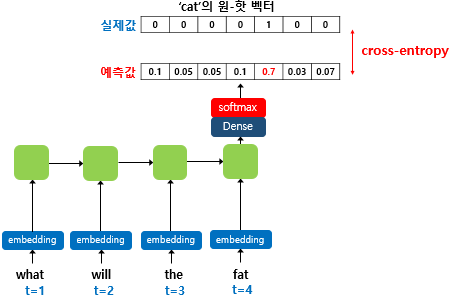)

![rnnlm3_final[1].PNG](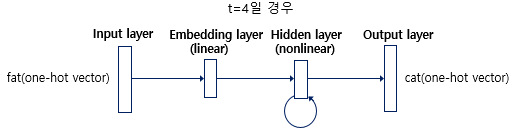)

- RNNLM은 위의 그림과 같이 총 4개의 층(layer)으로 이루어진 인공 신경망
  - **입력층(input layer)** : 원-핫 벡터
  - **출력층(output layer)**
    - 모델이 예측해야하는 정답에 해당되는 단어의 원-핫 벡터는 출력층에서 모델이 예측한 값의 오차를 구하기 위해 사용
    - 이 오차로부터 손실 함수를 사용해 인공 신경망이 학습

    ![rnnlm4_final[1].PNG](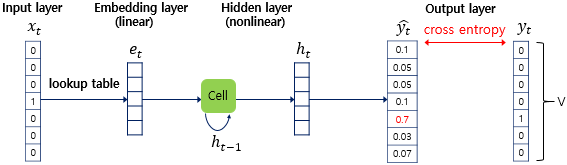)

- 현 시점의 입력 단어의 원-핫 벡터 $x_t$를 입력 받은 RNNLM은 우선 임베딩층(embedding layer)을 지남
  - 이 임베딩층은 기본적으로 투사층(projection layer)

<br>

- 단어 집합의 크기가 V일 때, 임베딩 벡터의 크기를 M으로 설정하면, 

  각 입력 단어들은 임베딩층에서 V × M 크기의 임베딩 행렬과 곱해짐 (V는 단어 집합의 크기를 의미)
  
  임베딩 행렬은 역전파 과정에서 다른 가중치들과 함께 학습

<br>

  $$임베딩층\;:\; e_{t} = lookup(x_{t})$$

<br>

- 임베딩 벡터는 은닉층에서 이전 시점의 은닉 상태인 $h_{t-1}$과 함께 다음의 연산을 하여 현재 시점의 은닉 상태 $h_t$
를 계산

<br>

$$은닉층\;:\; h_{t} = tanh(W_{x} e_{t} + W_{h}h_{t−1} + b)$$

<br>

- **출력층에서는 활성화 함수로 소프트맥스(softmax) 함수를 사용**
  - V차원의 벡터는 소프트맥스 함수를 지나면서 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1이 되는 상태로 변경
  
<br>

$$출력\;:\; \hat{y_{t}} = softmax(W_{y}h_{t} + b)$$

<br>

- 벡터 $\hat{y_{t}}$의 j번째 인덱스가 가진 0과 1사이의 값은 **j번째 단어가 다음 단어일 확률**
- $\hat{y_{t}}$는 실제값. **즉, 실제 정답에 해당되는 단어인 원-핫 벡터의 값에 가까워져야 함**
- **실제값에 해당되는 다음 단어를 $y$라고 했을 때, 이 두 벡터가 가까워지게 하기위해서 RNNLM는 손실 함수로 cross-entropy 함수를 사용**
- 역전파가 이루어지면서 가중치 행렬들이 학습되는데, 이 과정에서 임베딩 벡터값들도 학습이 진행

<br>

**룩업 테이블의 대상이 되는 테이블인 임베딩 행렬을 $E$라고 하였을 때, 결과적으로 RNNLM에서 학습 과정에서 학습되는 가중치 행렬은 다음의 $E$, $W_x$, $W_h$, $W_y$4개**

<br>

<br>

## 텍스트 생성

<br>

### RNN을 이용한 텍스트 생성 (Text Generation using RNN)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

- 단어 집합을 생성하고 크기를 확인

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


- 각 단어와 단어에 부여된 정수 인덱스를 출력

In [ ]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


<br>

* 훈련 데이터생성

In [ ]:
sequences = list()

for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [ ]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


<br>

- [2, 3]은 [경마장에, 있는]에 해당되며 [2, 3, 1]은 [경마장에, 있는, 말이]에 해당
- **전체 훈련 데이터에 대해서 맨 우측에 있는 단어에 대해서만 레이블로 분리**

<br>

- **샘플의 최대길이인 6으로 패딩**

In [ ]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [ ]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [ ]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


<br>

- 레이블 분리
  - 리스트의 마지막 값을 제외하고 저장한 것은 X
  - 리스트의 마지막 값만 저장한 것은 y

In [ ]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [ ]:
print(X, end='\n\n')
print(y)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]

[ 3  1  4  5  1  7  1  9 10  1 11]


<br>

- 원-핫 인코딩

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<br>

#### 모델 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 10)          120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=200, verbose=False)

<br>

- 모델이 정확하게 예측하고 있는지 문장을 생성하는 함수

In [ ]:
def sentence_generation(model, tokenizer, current_word, n): 
    init_word = current_word
    sentence = ''

    for _ in range(n):
      
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')

        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


<br>


### LSTM을 이용한 텍스트 생성 

파일 다운로드 링크 : https://www.kaggle.com/aashita/nyt-comments

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#### 데이터 로드 & 전처리

In [ ]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head(5)

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [ ]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


<br>

- headline 열에서 모든 신문 기사의 제목을 뽑아서 하나의 리스트로 저장

In [ ]:
headline = []

headline.extend(list(df.headline.values)) 
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

- 결측값 제거

In [ ]:
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [ ]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

<br>

- 구두점 제거와 단어 소문자

In [ ]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

In [ ]:
preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

<br>

- 단어 집합(vocabulary) 생성 및 크기 확인

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


<br>

- 정수 인코딩 & 하나의 문장을 여러 줄로 분해하여 훈련 데이터를 구성

In [ ]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [ ]:
sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

<br>

- 어떤 정수가 어떤 단어를 의미하는지 알아보기 위해 인덱스로부터 단어를 찾는 `index_to_word`생성

In [ ]:
index_to_word = {}

for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

In [ ]:
print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


<br>

- 가장 긴 샘플의 길이로 패딩

In [ ]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [ ]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


<br>

- 맨 우측 단어만 레이블로 분리

In [ ]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [ ]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [ ]:
print(y[:3])

[ 269  371 1115]


<br>

- 원-핫 인코딩

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

<br>

#### 모델 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
embedding_dim = 10
hidden_units = 128

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 10)          34940     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense_1 (Dense)             (None, 3494)              450726    
                                                                 
Total params: 556,834
Trainable params: 556,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=200, verbose=False)

<br>

- 문장을 생성하는 함수

In [ ]:
def sentence_generation(model, tokenizer, current_word, n): 
    init_word = current_word
    sentence = ''

    for _ in range(n):

        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, 'i', 10))

i want to be rich and im not sorry think no


In [ ]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to make a crossword puzzle bars at the prosecutor in


<br>

<br>

## 문자 단위 RNN(Char RNN)
- 입출력의 단위를 단어 레벨(word-level)에서 문자 레벨(character-level)로 변경하여 RNN을 구현

![char_rnn1[1].PNG](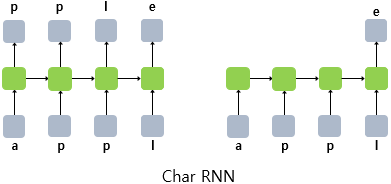)

<br>

### 문자 단위 RNN 언어 모델(Char RNNLM)

- 이전 시점의 예측 문자를 다음 시점의 입력으로 사용하는 문자 단위 RNN 언어 모델
- **문자 단위를 입, 출력으로 사용하므로 임베딩층(embedding layer)을 여기서는 사용하지 않음**

<br>

데이터 다운로드 링크 : http://www.gutenberg.org/files/11/11-0.txt



<br>

#### 데이터 로드 전처리

In [ ]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

In [ ]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [67]:
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [68]:
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))

문자열의 길이 또는 총 문자의 개수: 159484


<br>

- 하나의 문자열로 통합

In [70]:
total_data[:200]

'the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with'

<br>

- **문자 집합 생성**


In [71]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 56


<br>

- **영어가 훈련 데이터일 때 문자 집합의 크기는 단어 집합을 사용했을 경우보다 집합의 크기가 현저히 작음**
  - 아무리 훈련 코퍼스에 수십만 개 이상의 많은 영어 단어가 존재한다고 하더라도, 영어 단어를 표현하기 위해서 사용되는 문자는 26개의 알파벳뿐이기 때문
  - 만약 훈련 데이터의 알파벳이 대, 소문자가 구분된 상태라고 하더라도 모든 영어 단어는 총 52개의 알파벳으로 표현 가능


<br>

- 문자에 고유한 정수 부여

In [74]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

문자 집합 : {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


<br>

- **반대로 정수로부터 문자를 리턴하는 index_to_char 생성**

In [75]:
index_to_char = {}

for key, value in char_to_index.items():
    index_to_char[value] = key

In [77]:
print(index_to_char)

{0: ' ', 1: '!', 2: '"', 3: '#', 4: '$', 5: '%', 6: "'", 7: '(', 8: ')', 9: '*', 10: ',', 11: '-', 12: '.', 13: '/', 14: '0', 15: '1', 16: '2', 17: '3', 18: '4', 19: '5', 20: '6', 21: '7', 22: '8', 23: '9', 24: ':', 25: ';', 26: '?', 27: '[', 28: ']', 29: '_', 30: 'a', 31: 'b', 32: 'c', 33: 'd', 34: 'e', 35: 'f', 36: 'g', 37: 'h', 38: 'i', 39: 'j', 40: 'k', 41: 'l', 42: 'm', 43: 'n', 44: 'o', 45: 'p', 46: 'q', 47: 'r', 48: 's', 49: 't', 50: 'u', 51: 'v', 52: 'w', 53: 'x', 54: 'y', 55: 'z'}


<br>

#### 훈련 데이터 구성
```python
# appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
train_X = 'appl'
train_y = 'pple'
```

<br>

- 문장 샘플의 길이를 정하고, 해당 길이만큼 문자열 전체를 등분

In [78]:
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2658


<br>

- train_y[1]은 train_X[1]에서 오른쪽으로 한 칸 쉬프트 된 문장임을 확인

In [79]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [81]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

<br>

- 문자 단위 RNN에서는 입력 시퀀스에 대해서 워드 임베딩을 하지 않음 

  $→$ **임베딩층(embedding layer)을 사용하지 않으므로, 입력 시퀀스인 train_X에 대해서도 원-핫 인코딩**

In [82]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape))
print('train_y의 크기(shape) : {}'.format(train_y.shape)) 

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


<br>

### 모델 설계

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [84]:
hidden_units = 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, None, 256)         320512    
                                                                 
 lstm_2 (LSTM)               (None, None, 256)         525312    
                                                                 
 time_distributed (TimeDistr  (None, None, 56)         14392     
 ibuted)                                                         
                                                                 
Total params: 860,216
Trainable params: 860,216
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.fit(train_X, train_y, epochs=80, verbose=False)

In [94]:
def sentence_generation(model, length):

    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):

        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :], verbose=False)[0], 1)
        y_char.append(index_to_char[ix[-1]])

    return ('').join(y_char)

In [95]:
result = sentence_generation(model, 100)
print(result)

31 번 문자 b 로 예측을 시작!
be murder to leave it behind? she said the last words out loud. eyes you could hand the court, (intobe murder to leave it behind? she said the last words out loud. eyes you could hand the court, (into 


<br>

### 문자 단위 RNN(Char RNN)으로 텍스트 생성

<br>

#### 데이터 로드 전처리

In [96]:
import numpy as np
from tensorflow.keras.utils import to_categorical

- 임의의 문자열을 하나의 문자열로 재저장

In [97]:
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


<br>

- 문자 집합 생성

In [98]:
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합 :',char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합 : [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 : 33


<br>

- 문자에 고유한 정수 인덱스 부여

In [99]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) 
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


<br>

#### 데이터 라벨링

In [100]:
length = 11
sequences = []

for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 생성
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [101]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

<br>

- 문장에 대한 정수 인코딩

In [102]:
encoded_sequences = []

for sequence in sequences: 
    encoded_sequence = [char_to_index[char] for char in sequence] 
    encoded_sequences.append(encoded_sequence)

In [103]:
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

<br>

- 입력 데이터 / 출력 데이터 정의

In [104]:
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [106]:
print(X_data[:5], end='\n\n')
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]

[18 28 17  0 21]


<br>

- 원-핫 인코딩

In [107]:
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]

X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [108]:
print(X_data_one_hot.shape)

(426, 10, 33)


<br>

#### 모델 설계

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [110]:
hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

In [111]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=False)

<br>

- 문장 생성함수 정의

In [114]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [115]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to hang out with programming and deep learning.
